<a href="https://colab.research.google.com/github/Justworkname/6367/blob/main/Hw_4_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW 4

## Import

In [99]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog

Link

In [100]:
from google.colab import drive
drive.mount('/content/gdrive')

# this creates a link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
'6 16 2023 Meeting.gslides'
 6367
'7 12 2023 meeting.gslides'
 7340
'8 17 2023 meeting.gslides'
'8 30 2023 meeting.gslides'
'9 06 2023 meeting - Bar chart 1.gsheet'
'9 06 2023 meeting - Column chart 1 (1).gsheet'
'9 06 2023 meeting - Column chart 1 (2).gsheet'
'9 06 2023 meeting - Column chart 1.gsheet'
'9 06 2023 meeting.gslides'
'9 20 2023 meeting.gslides'
'AI in Breast Cancer in Medical Imaging.gslides'
 AI_MB
 AI_MB_3D
'Colab Notebooks'
 customTF2
 Data_Vision_Transformer
 fakeImages
 Grad_documents
'Invited Lecture September 19th.gdoc'
'My Drive'
'Presentation Evaluation sep 19.gdoc'
 Seminar
 Ultrasound_Images
 Undergrad_documents
'Veterinary Clinic Tumor Estimation Conclusion.gslides'
'Wild Magic.gsheet'


## Hyper Parameters

In [101]:
# File location
data_dir = '/content/gdrive/MyDrive/6367/hw_4/Training/'
class_folders = os.listdir(data_dir)
# Controls
image_Resize = (256, 256)
pixel_per_cell=(16,16)
cell_per_block=(4,4)

## Load Data

In [93]:
# Storage Lists
X = []
y = []

# Search for files then search for images in files, labels them by their directory
for label, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    for image_file in os.listdir(class_path):
        image_path = os.path.join(class_path, image_file)
        image = cv2.imread(image_path)

        # Resize
        image = cv2.resize(image, image_Resize)
        # Append list
        X.append(image)
        y.append(label)

# Convert to np data
X = np.array(X)
y = np.vstack(y)

## Show an image

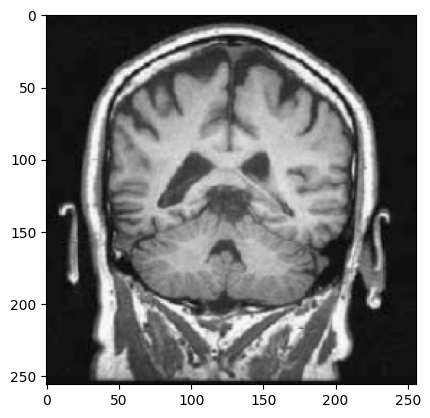

In [85]:
plt.imshow(X[1])

## HOG Extraction

In [86]:
# Extraction loop
hog_Images= []
hog_Features = []
for image in X:
    # Just in case the images are not Gray scale, sometimes data is mixed
    gray_image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract
    features, hold_Images = hog(gray_image,orientations=8,pixels_per_cell=pixel_per_cell, cells_per_block=cell_per_block,block_norm= 'L2', visualize=True)
    hog_Images.append(hold_Images)
    hog_Features.append(features)
# List to vstack
X_hog = np.vstack(hog_Features)

## Show gradients

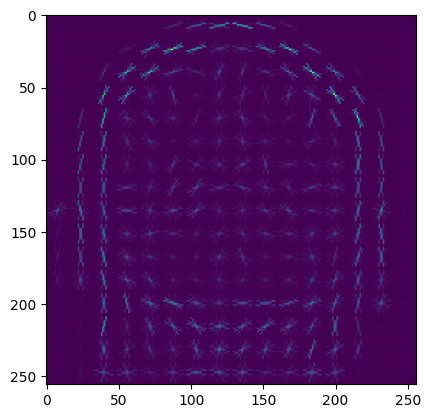

In [90]:
plt.imshow(hog_Images[1])

## Train and Test

In [97]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, random_state=42)

clf = svm.SVC(kernel='linear')
clf.fit(X_hog,y.reshape(-1))

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## The written part

1) The data base is a set of imags that are rather tumors or not tumors. The sizes vary and they should all be gray scale, but I converted it just in case due to experiences with mixed data.

2) The problem is being able to seperate the images into tumor and non tumor groups. The data set is actually supposed to be different types of tumors, but for purposes of keepinjg this easy I just did a binary classification.

3) By creating a list of features using HOG ( a very popular feature extraction method) it is possible to seperate the data with a linear multi-dimensional plane. Due to the inputs not just being 1 or 2 features it gets hard to understand but, imagining a set of 2 features being seperable by a line a set of 3 features can be seperated by a plane. Applying this to multiple dimensions there is a multi-dimensional vector which can seperate the data, not always perfectly, but due to the large number of features we can see a very accurate division of data.

4) The code is above, on a data set of 100 non tumors and 100 tumors, it achieved an accuracy of 100%.

5) The results are 100 percent accurate, which seems suspicious, it is likely that the data is not simmilar enough to trick the model. I made sure to check that the images are from multiple different angles and there is no particular reason it is so accurate, but it may jsut be too small of a data set. if you would like to add more of the data set it is on my github.